In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\python projects\ML_Zoomcamp\Daniel-ML-Zoomcamp\Module 2\car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

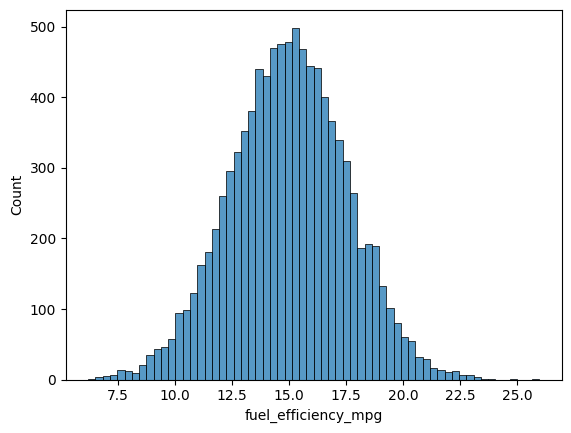

In [3]:
sns.histplot(df.fuel_efficiency_mpg)

# Question 1 


There's one column with missing values. What is it?

In [4]:
df.isnull().sum() #horsepower

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

# Question 2

What's the median (50% percentile) for variable 'horsepower'?

In [5]:
df.horsepower.median() #149

np.float64(149.0)

In [6]:
# To create our validation framework, we will split the data into three parts: training, validation, and test.
# wee will use 60% of the data for training, 20% for validation, and 20% for testing.

# Setting up the validation framework
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n, n_train, n_val, n_test)
print(n_train + n_val + n_test)

9704 5824 1940 1940
9704


In [7]:
np.random.seed(42)
idx = np.arange(n)

np.random.shuffle(idx)
idx


array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [8]:
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_train+n_test]]
df_val = df.iloc[idx[n_train+n_test:]]

print(len(df_train), len(df_val), len(df_test))
len(df_train) + len(df_val) + len(df_test)

5824 1940 1940


9704

In [9]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


# Mean approach

In [10]:
df_train_mean = df_train.copy()
df_test_mean = df_test.copy()
df_val_mean = df_val.copy()

In [11]:
print(df_train_mean.horsepower.isnull().sum())


429


Get the mean

In [12]:
training_mean = df_train_mean.horsepower.mean()
training_mean

np.float64(149.54476367006487)

Fill the nans

Get the model framework

In [13]:

df_train_mean.loc[:, "horsepower"] = df_train_mean.loc[:, "horsepower"].fillna(training_mean)
df_test_mean.loc[:, "horsepower"] = df_test_mean.loc[:, "horsepower"].fillna(training_mean)
df_val_mean.loc[:, "horsepower"] = df_val_mean.loc[:, "horsepower"].fillna(training_mean)

y_train_mean = df_train_mean.pop("fuel_efficiency_mpg").values
y_val_mean = df_val_mean.pop("fuel_efficiency_mpg").values
y_test_mean = df_test_mean.pop("fuel_efficiency_mpg").values

In [14]:
def prepare_X(df):
    df = df.copy()
    base_cols = ["engine_displacement", "horsepower", "vehicle_weight", "model_year"]     
    return df[base_cols].values

In [15]:
def train_linear_regression(X, y):
    X = np.column_stack([np.ones(X.shape[0]), X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

def train_linear_regression_reg(X, y, r=0.001):

    ones = np.ones(X.shape[0])
    X1 = np.column_stack([ones, X]) 


    XTX = X1.T.dot(X1)
    XTX = XTX + r * np.eye(XTX.shape[0]) 
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X1.T).dot(y)
    return w_full[0], w_full[1:]

In [16]:
def rmse_score(y, y_pred):
    error = y-y_pred
    se = error**2
    mse = se.mean()
    return mse**0.5


In [17]:
def modeling_pipeline(
        df_train,
        y_train,
        df_val,
        y_val,
        r=0.001,
        reg=False
    ):

    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)

    if reg:
        w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    else:
        w0, w = train_linear_regression(X_train, y_train)


    y_pred_val = w0 + X_val.dot(w)
    rmse_value = round(rmse_score(y_val, y_pred_val), 2)
    
    print("RMSE:", rmse_value)
    print("w0:", w0)
    print("length of w:", w)
    return rmse_value


In [18]:
modeling_pipeline(
    df_train_mean, y_train_mean, df_val_mean, y_val_mean, reg=False
)

RMSE: 0.46
w0: 28.92525995211667
length of w: [ 0.00012093  0.01030308 -0.00501009 -0.00023463]


np.float64(0.46)

# Zero approach

In [19]:

df_train_zero = df_train.copy()
df_test_zero = df_test.copy()
df_val_zero = df_val.copy()

In [20]:

df_train_zero.loc[:, "horsepower"] = df_train_zero.loc[:, "horsepower"].fillna(0)
df_test_zero.loc[:, "horsepower"] = df_test_zero.loc[:, "horsepower"].fillna(0)
df_val_zero.loc[:, "horsepower"] = df_val_zero.loc[:, "horsepower"].fillna(0)


y_train_zero = df_train_zero.pop("fuel_efficiency_mpg").values
y_val_zero = df_val_zero.pop("fuel_efficiency_mpg").values
y_test_zero = df_test_zero.pop("fuel_efficiency_mpg").values

In [21]:
modeling_pipeline(
    df_train_zero, 
    y_train_zero, 
    df_val_zero, 
    y_val_zero, 
    reg=False
)

RMSE: 0.52
w0: 28.827365474598718
length of w: [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992869e-04]


np.float64(0.52)

Answer to Q3:

The best model befor regularization is the one using the mean

# Question 4

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?
- If multiple options give the same best RMSE, select the smallest r.

In [22]:
for i in [0, 0.01, 0.1, 1, 5, 10, 100]:
    print("r =", i)
    modeling_pipeline(
        df_train_zero, 
        y_train_zero, 
        df_val_zero, 
        y_val_zero, 
        r=i,
        reg=True
    )

r = 0
RMSE: 0.52
w0: 28.827365474598718
length of w: [ 9.93613218e-05  3.54221891e-03 -5.01328015e-03  3.42992869e-04]
r = 0.01
RMSE: 0.52
w0: 24.926838421084422
length of w: [ 0.00010643  0.0035422  -0.00501248  0.00228024]
r = 0.1
RMSE: 0.52
w0: 11.239661085047366
length of w: [ 0.00013125  0.00354212 -0.00500966  0.00907815]
r = 1
RMSE: 0.52
w0: 1.7315979412398264
length of w: [ 0.00014849  0.00354207 -0.00500771  0.01380046]
r = 5
RMSE: 0.52
w0: 0.36380750207153073
length of w: [ 0.00015098  0.00354206 -0.00500743  0.01447979]
r = 10
RMSE: 0.52
w0: 0.18306246622476907
length of w: [ 0.0001513   0.00354206 -0.00500739  0.01456956]
r = 100
RMSE: 0.52
w0: 0.01841801730804525
length of w: [ 0.00015161  0.00354204 -0.00500736  0.01465133]


Answer: Due the rounding I'm getting 0.52 on RSME on all the regularizations. So I'll pick 0 as R

# Question 5

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))
- What's the value of std?

0.001
0.006
0.060
0.600
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [23]:
rmse_values = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    print("*"*100)
    print("Seed:", seed)

    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].copy()
    df_test = df.iloc[idx[n_train:n_train+n_test]].copy()
    df_val = df.iloc[idx[n_train+n_test:]].copy()

    print(len(df_train), len(df_val), len(df_test))
    len(df_train) + len(df_val) + len(df_test)

    df_train_zero = df_train.copy()
    df_test_zero = df_test.copy()
    df_val_zero = df_val.copy()

    df_train_zero.loc[:, "horsepower"] = df_train_zero.loc[:, "horsepower"].fillna(0)
    df_test_zero.loc[:, "horsepower"] = df_test_zero.loc[:, "horsepower"].fillna(0)
    df_val_zero.loc[:, "horsepower"] = df_val_zero.loc[:, "horsepower"].fillna(0)

    y_train_zero = df_train_zero.pop("fuel_efficiency_mpg").values
    y_val_zero = df_val_zero.pop("fuel_efficiency_mpg").values
    y_test_zero = df_test_zero.pop("fuel_efficiency_mpg").values

    rmse = modeling_pipeline(
        df_train_zero, 
        y_train_zero, 
        df_val_zero, 
        y_val_zero, 
        reg=False
    )

    rmse_values.append(rmse)
    

****************************************************************************************************
Seed: 0
5824 1940 1940
RMSE: 0.52
w0: 27.376388746129475
length of w: [ 0.00018021  0.00369662 -0.00500077  0.00102818]
****************************************************************************************************
Seed: 1
5824 1940 1940
RMSE: 0.53
w0: 29.022468555840756
length of w: [ 9.11368124e-05  3.52555390e-03 -5.01868823e-03  2.57195231e-04]
****************************************************************************************************
Seed: 2
5824 1940 1940
RMSE: 0.51
w0: 25.904357611918527
length of w: [ 0.0001526   0.00378541 -0.00500641  0.00176812]
****************************************************************************************************
Seed: 3
5824 1940 1940
RMSE: 0.52
w0: 28.015450068187377
length of w: [ 0.0001811   0.0037275  -0.00500894  0.0007184 ]
****************************************************************************************************

In [25]:
round(np.std(rmse_values), 3)

np.float64(0.008)

# Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What's the RMSE on the test dataset?

In [26]:


np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].copy()
df_test = df.iloc[idx[n_train:n_train+n_test]].copy()
df_val = df.iloc[idx[n_train+n_test:]].copy()


df_full = pd.concat([df_train, df_val])


df_test_zero = df_test.copy()

df_full.loc[:, "horsepower"] = df_full.loc[:, "horsepower"].fillna(0)
df_test_zero.loc[:, "horsepower"] = df_test_zero.loc[:, "horsepower"].fillna(0)


y_train_zero = df_full.pop("fuel_efficiency_mpg").values
y_test_zero = df_test_zero.pop("fuel_efficiency_mpg").values

rmse = modeling_pipeline(
    df_full, 
    y_train_zero, 
    df_test_zero, 
    y_test_zero, 
    reg=True,
    r=0.001
)
print("Final RMSE:", rmse)

RMSE: 0.51
w0: 27.561992893690466
length of w: [ 2.64882519e-05  3.57550468e-03 -5.01510082e-03  9.82899778e-04]
Final RMSE: 0.51
